In [1]:
# Import Importanat Libraries

import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np
import json
import statistics as st
import warnings
warnings.filterwarnings('ignore')

## Task 1 : Load the movie dataset in the python notebook. 
### Display the numbers of row and columns in the dataset. 
### Display the titles and the genres of the first 50 movies from the dataset.

In [2]:
#Reading data from existing .csv file using read_csv() of pandas module and store into a dataframe

df = pd.read_csv("DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset (1).csv")
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
df.shape

(4803, 20)

In [4]:
# Convert JSON column to Python dictionary

df['genres'] = df['genres'].apply(json.loads)

In [5]:
# Access the values from the dictionaries within the DataFrame

df["genre"] = df["genres"].apply(lambda x: [i['name'] for i in x])

In [6]:
df1 = df[["original_title", "genre"]]
df1.head(50)

,original_title,genre
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Fantasy, Action, Adventure]"
6,Tangled,"[Animation, Family]"
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"


## Task 2 : Identify the columns that have null values and perform the null value treatment.
### (choose the imputation method based on the type of data in the columns of interest)

In [7]:
# Checking if there are null values in any columns
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
genre                      0
dtype: int64

In [8]:
# Seperate data by datatypes

def seperate_data_types(df):
    categorical = []
    continous = []
    for column in df.columns:
        if df[column].dtypes == object:
            categorical.append(column)
        else:
            continous.append(column)
    return categorical,continous
categorical,continous = seperate_data_types(df)
table = [categorical,continous]
print(tabulate({'Categorical':categorical,'Continous':continous},headers=['categorical','continous']))

categorical           continous
--------------------  ------------
genres                budget
homepage              id
keywords              popularity
original_language     revenue
original_title        runtime
overview              vote_average
production_companies  vote_count
production_countries
release_date
spoken_languages
status
tagline
title
genre


In [9]:
def info_of_cat(col):
    print(f"unique values in {col} are : {df[col].unique()}")
    print(f"mode of {col} is : {df[col].mode()[0]}")
    print(f"total count of missing values in {col} is : {df[col].isnull().sum()}")

In [10]:
info_of_cat("homepage")

unique values in homepage are : ['http://www.avatarmovie.com/'
 'http://disney.go.com/disneypictures/pirates/'
 'http://www.sonypictures.com/movies/spectre/' ...
 'http://www.primermovie.com'
 'http://www.hallmarkchannel.com/signedsealeddelivered'
 'http://shanghaicalling.com/']
mode of homepage is : http://www.missionimpossible.com/
total count of missing values in homepage is : 3091


In [11]:
df['homepage'].fillna("http://www.missionimpossible.com/", inplace = True)

In [12]:
info_of_cat("homepage")

unique values in homepage are : ['http://www.avatarmovie.com/'
 'http://disney.go.com/disneypictures/pirates/'
 'http://www.sonypictures.com/movies/spectre/' ...
 'http://www.primermovie.com'
 'http://www.hallmarkchannel.com/signedsealeddelivered'
 'http://shanghaicalling.com/']
mode of homepage is : http://www.missionimpossible.com/
total count of missing values in homepage is : 0


In [13]:
info_of_cat("tagline")

unique values in tagline are : ['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']
mode of tagline is : Based on a true story.
total count of missing values in tagline is : 844


In [14]:
df['tagline'].fillna("Based on a true story.", inplace = True)

In [15]:
info_of_cat("tagline")

unique values in tagline are : ['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']
mode of tagline is : Based on a true story.
total count of missing values in tagline is : 0


In [16]:
info_of_cat("overview")

unique values in overview are : ['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'
 ...
 '"Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the pas

In [17]:
df.dropna(subset = ["overview"], inplace = True)

In [18]:
info_of_cat("release_date")

unique values in release_date are : ['10-12-2009' '19-05-2007' '26-10-2015' ... '26-12-2011' '13-10-2013'
 '03-05-2012']
mode of release_date is : 01-01-2006
total count of missing values in release_date is : 1


In [19]:
df.dropna(subset = ["release_date"], inplace = True)

In [20]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
genre                   0
dtype: int64

## Task 3 : Display the movie categories that have a budget greater than $220,000

In [21]:
budget = df[(df.budget > 220000)]
budget = budget.sort_values('budget', ascending = False)
budget

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
17,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,14-05-2011,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,"[Adventure, Action, Fantasy]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Action, Adventure, Science Fiction]"
10,270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,28-06-2006,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Based on a true story.,Superman Returns,5.4,1400,"[Adventure, Fantasy, Action, Science Fiction]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.viewaskew.com/chasingamy/,2255,"[{""id"": 586, ""name"": ""new jersey""}, {""id"": 186...",en,Chasing Amy,Holden and Banky are comic book artists. Every...,20.601483,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,04-04-1997,12021272,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's not who you love. It's how.,Chasing Amy,6.7,433,"[Comedy, Drama, Romance]"
4661,245000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.missionimpossible.com/,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...",...,05-11-1925,22000000,151.0,[],Released,Based on a true story.,The Big Parade,7.0,21,"[Drama, Romance, War]"
4664,230000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://www.bronsonthemovie.com,18533,"[{""id"": 378, ""name"": ""prison""}, {""id"": 1533, ""...",en,Bronson,A young man who was sentenced to 7 

In [22]:
budget = budget[["genre", "budget"]]
budget

,genre,budget
17,"[Adventure, Action, Fantasy]",380000000
1,"[Adventure, Fantasy, Action]",300000000
7,"[Action, Adventure, Science Fiction]",280000000
10,"[Adventure, Fantasy, Action, Science Fiction]",270000000
4,"[Action, Adventure, Science Fiction]",260000000
...,...,...
4631,"[Comedy, Drama, Romance]",250000
4661,"[Drama, Romance, War]",245000
4664,"[Drama, Action, Crime]",230000
4666,"[Foreign, Documentary]",225000


In [56]:
new = budget['genre'].explode().value_counts(sort = True)
new

Drama              1694
Comedy             1282
Thriller           1059
Action             1007
Adventure           716
Romance             663
Crime               588
Science Fiction     467
Family              408
Horror              384
Fantasy             373
Mystery             292
Animation           206
History             164
Music               133
War                 131
Western              65
Documentary          47
Foreign               7
TV Movie              3
Name: genre, dtype: int64

## Task 4 : Display the movie categories where the revenue is greater than $961,000,000.

In [23]:
revenue = df[(df.revenue > 961000000)]
revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Action, Adventure, Science Fiction]"
12,200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,20-06-2006,1065659812,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[Adventure, Fantasy, Action]"
16,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[Science Fiction, Action, Adventure]"
17,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,14-05-2011,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,"[Adventure, Action, Fantasy]"
25,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[Drama, Romance, Thriller]"
26,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://marvel.com/captainamericapremiere,271110,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 6091...",en,Captain America: Civil War,"Following the events of Age of Ultron, the col

In [24]:
revenue = df[(df.revenue > 961000000)]
revenue = revenue.sort_values('revenue', ascending = False)
revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
25,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[Drama, Romance, Thriller]"
16,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[Science Fiction, Action, Adventure]"
28,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"[Action, Adventure, Science Fiction, Thriller]"
44,190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,[Action]
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Action, Adventure, Science Fiction]"
124,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,27-11-2013,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295,"[Animation, Adventure, Family]"
31,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[{""name"": ""Marvel Studios"", ""id"": 420}]",...,18-04-2013,1215439994,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Unleash the power behind the armor.,Iron Man 3,6.8,8806,"[Action, Adventure, Scien

In [25]:
revenue = revenue[["genre", "revenue"]]
revenue

,genre,revenue
0,"[Action, Adventure, Fantasy, Science Fiction]",2787965087
25,"[Drama, Romance, Thriller]",1845034188
16,"[Science Fiction, Action, Adventure]",1519557910
28,"[Action, Adventure, Science Fiction, Thriller]",1513528810
44,[Action],1506249360
7,"[Action, Adventure, Science Fiction]",1405403694
124,"[Animation, Adventure, Family]",1274219009
31,"[Action, Adventure, Science Fiction]",1215439994
546,"[Family, Animation, Adventure, Comedy]",1156730962
26,"[Adventure, Action, Science Fiction]",1153304495


In [57]:
new1 = revenue['genre'].explode().value_counts(sort = True)
new1

Adventure          18
Action             16
Fantasy             8
Science Fiction     8
Family              7
Thriller            5
Drama               4
Animation           4
Comedy              3
Crime               2
Romance             1
Name: genre, dtype: int64

## Task 5 : In the dataset, there are some movies for which the budget and revenue columns have the value 0, which mean unknown values.
### Remove the row with value 0 from both the budget and revenue columns.

In [26]:
df_1 = df[(df.revenue == 0) & (df.budget == 0)]
df_1 = df_1[["title", "genre", "budget", "revenue"]]
df_1

,title,genre,budget,revenue
265,The Cat in the Hat,"[Comedy, Fantasy, Family]",0,0
406,Arthur Christmas,"[Drama, Animation, Family, Comedy]",0,0
453,The Pink Panther,"[Action, Comedy, Crime, Mystery, Family]",0,0
463,Déjà Vu,"[Romance, Drama]",0,0
474,Evolution,"[Mystery, Drama, Horror]",0,0
...,...,...,...,...
4795,Bang,[Drama],0,0
4797,Cavite,"[Foreign, Thriller]",0,0
4800,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]",0,0
4801,Shanghai Calling,[],0,0


In [27]:
df = df[(df.revenue != 0) & (df.budget != 0)]
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,[Comedy]
4788,12000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",http://www.missionimpossible.com/,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]"
4792,20000,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",http://www.missionimpossible.com/,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]",...,06-11-1997,99000,111.0,"[{""iso_63

## Task 6 : List the top 10 movies with the highest revenues and the top 10 movies with the least budget.

In [28]:
hig_revenue = df.sort_values('revenue', ascending = False)
top_10 = hig_revenue[["original_title", "revenue"]]
top_10.head(10)

,original_title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


In [29]:
least_budget = df.sort_values('budget', ascending = True)
least_budget.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
4238,1,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.missionimpossible.com/,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,05-02-1936,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,"[Drama, Comedy]"
3611,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.missionimpossible.com/,22649,"[{""id"": 131, ""name"": ""italy""}, {""id"": 428, ""na...",en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,1.199451,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,08-12-1932,25,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every woman who has loved will understand,A Farewell to Arms,6.2,28,"[Drama, Romance, War]"
3372,7,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.missionimpossible.com/,13006,"[{""id"": 3528, ""name"": ""flooding""}, {""id"": 9685...",en,Split Second,"In a futuristic London, the rising sea levels ...",4.857028,"[{""name"": ""Entertainment"", ""id"": 7676}, {""name...",...,01-05-1992,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's seen the future. Now he has to kill it.,Split Second,5.7,63,"[Thriller, Action, Horror, Science Fiction, Cr..."
3419,7,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.missionimpossible.com/,38415,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 18705...",en,Bran Nue Dae,In the Summer of 1965 a young man is filled wi...,0.050456,[],...,09-08-2009,7,82.0,[],Released,Bran Nue Dae,Bran Nue Dae,5.2,6,"[Comedy, Drama, Foreign, Romance]"
4608,8,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",http://www.missionimpossible.com/,11980,"[{""id"": 290, ""name"": ""angel""}, {""id"": 3648, ""n...",en,The Prophecy,The angel Gabriel comes to Earth to collect a ...,11.818333,"[{""name"": ""Dimension Films"", ""id"": 7405}]",...,01-09-1995,16,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"On ancient ground, at the edge of the world, a...",The Prophecy,6.4,138,"[Fantasy, Horror, Thriller]"
3131,10,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://hrosss.is/the-film/,217708,"[{""id"": 2673, ""name"": ""horse""}, {""id"": 3373, ""...",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[{""name"": ""Filmhuset Gruppen"", ""id"": 68384}, {...",...,30-08-2013,11,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Based on a true story.,Of Horses and Men,6.9,26,"[Drama, Romance, Comedy]"
3137,10,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.missionimpossible.com/,78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...",...,28-09-2013,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your pain is her pleasure.,Nurse 3-D,4.9,119,"[Horror, Thriller]"
2933,11,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://www.missionimpossible.com/,28932,[],en,F.I.S.T.,Johnny Kovak joins the Teamsters trade-union i...,3.375208,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,26-04-1978,11,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,F.I.S.T.,6.4,29,"[Drama, Action]"
1912,25,"[{'id': 18, 'name': 'Drama'}]",http://www.missionimpossible.com/,10397,"[{""id"": 1625, ""name"": ""emigration""}, {""id"": 18...",en,Angela's Ashes,Based on the best selling autobiography by Iri...,4.887940,"[{""name"": ""Paramount Pictures"", ""id"": 4}, 

In [30]:
least_budget = df.sort_values('budget', ascending = True)
least_10 = least_budget[["original_title", "budget"]]
least_10.head(10)

,original_title,budget
4238,Modern Times,1
3611,A Farewell to Arms,4
3372,Split Second,7
3419,Bran Nue Dae,7
4608,The Prophecy,8
3131,Hross í oss,10
3137,Nurse 3-D,10
2933,F.I.S.T.,11
1912,Angela's Ashes,25
1771,The 51st State,28


## Task 7 : How are popularities of movies related with the movie budgets? Are they correlated or totally uncorrelated with each other?
### Write a interpretation of your analysis.

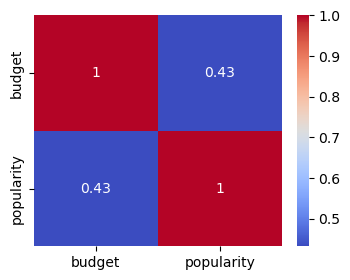

In [31]:
# Create a new dataframe with only the two columns of interest
df_subset = df[['budget', 'popularity']]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

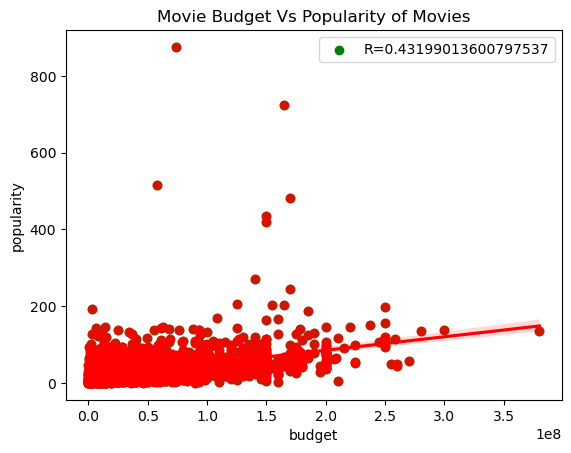

In [32]:
c_corr = df["budget"].corr(df["popularity"])

#Showing relation among variables using Scatter plot

plt.scatter(df['budget'], df['popularity'], color = 'green', label = "R=" +str(c_corr))
plt.title("Movie Budget Vs Popularity of Movies")
plt.xlabel("R=" +str(c_corr))
# plt.xlabel("Mileage")
# plt.ylabel("Displacement")
sns.regplot(data= df,x='budget',y='popularity', color = 'red')
plt.legend()
plt.show()

In [33]:
# sns.scatterplot(x = df["budget"], y = df["popularity"])
# sns.regplot(x = df["budget"], y = df["popularity"])
# plt.show()


## Task 8 : Identify and display the names of all production companies along with the number of times they appear in the dataset.

In [34]:
df['production_companies'] = df['production_companies'].apply(json.loads)

In [35]:
# Access the values from the dictionaries within the DataFrame

df['Company_name'] = df['production_companies'].apply(lambda x: [i['name'] for i in x])

In [36]:
company = df['Company_name'].explode().value_counts(sort = True)
company

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
HW Two                                      1
Unfinished Films                            1
Infinity Features Entertainment             1
British Columbia Film                       1
Daiei Studios                               1
Name: Company_name, Length: 3564, dtype: int64

## Task 9 : Display the name of the top 25 production companies based on the number of movies they have produced in descending order of the number of movies produced.

In [37]:
company.head(25)

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
Miramax Films                              67
DreamWorks SKG                             67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Canal+                                     48
Summit Entertainment                       48
Fox Searchlight Pictures          

## Task 10 : Sort the data in descending order based on the revenue and filter the top 500 movies. Find the measures of central tendency for the following columns using the filtered data 
### 1. budget                                          2. revenue                                                    3. runtime
### Perform outlier analysis for the above three columns using box plot.

In [38]:
top_movies = df[["title","revenue", "budget", "runtime"]].sort_values("revenue", ascending = False).head(500)
top_movies
# top_500 = top_movies.sort_values('revenue', ascending = False)
# top_500 = top_500.head(500)
# top_500

,title,revenue,budget,runtime
0,Avatar,2787965087,237000000,162.0
25,Titanic,1845034188,200000000,194.0
16,The Avengers,1519557910,220000000,143.0
28,Jurassic World,1513528810,150000000,124.0
44,Furious 7,1506249360,190000000,137.0
...,...,...,...,...
397,It's Complicated,219103655,85000000,121.0
1744,Knocked Up,219076518,30000000,129.0
698,The Prince of Egypt,218613188,70000000,99.0
717,Jack Reacher,218340595,60000000,130.0


In [39]:
df2 = top_movies[["revenue", "budget", "runtime"]]

In [40]:
# Declaring three list to store the values of mean, median and mode of three columns

Mean = []
Median = []
Mode = []

# Interact in each column of data frame
for col in df2:
    Mean.append(df2[col].mean())      # caluclting the mean value and storing in the mean name list
    Median.append(df2[col].median())  # caluclting the median value and storing in the median name list
    Mode.append(st.mode(df2[col]))   # caluclting the mode value and storing in the mode name list

row_head = ['Mean', 'Median', 'Mode']
col_names = ['revenue', 'budget', 'runtime']

# Creating a data frame with all the calculate mean, median and mode of theree Subjects

d_data = pd.DataFrame([Mean, Median, Mode], columns = col_names)
d_data.insert(0,'Measures', row_head)
d_data


,Measures,revenue,budget,runtime
0,Mean,4.585776e+08,103193736.0,118.72
1,Median,3.630016e+08,95000000.0,116.00
2,Mode,2.787965e+09,150000000.0,115.00


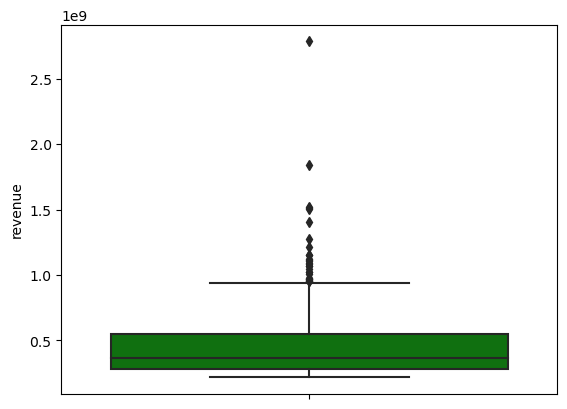

In [41]:

sns.boxplot(y=df2["revenue"], color = 'g')
plt.show()

In [43]:
x = df2[df2['revenue']>=0.6e+09].index
mean = df2['revenue'].mean()
for index in x:
    df2.loc[index, 'revenue'] = mean

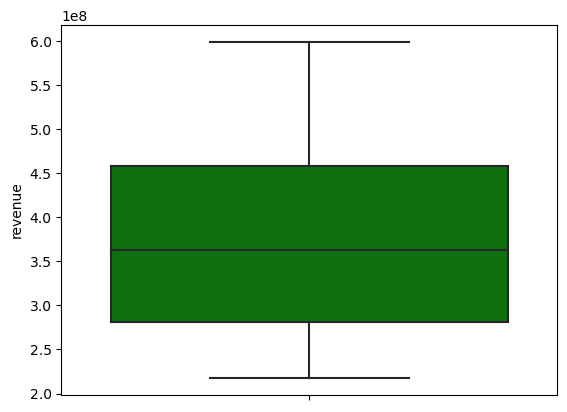

In [44]:
sns.boxplot(y=df2["revenue"], color = 'g')
plt.show()

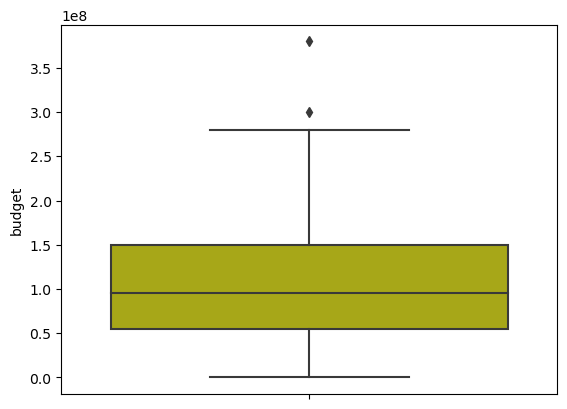

In [45]:
sns.boxplot(y=df2["budget"], color = 'y')
plt.show()

In [46]:
x = df2[df2['budget']>=2.5e+08].index
mean = df2['budget'].mean()
for index in x:
    df2.loc[index, 'budget'] = mean

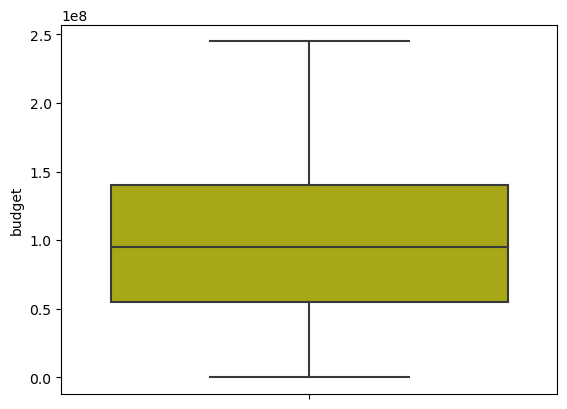

In [47]:
sns.boxplot(y=df2["budget"], color = 'y')
plt.show()

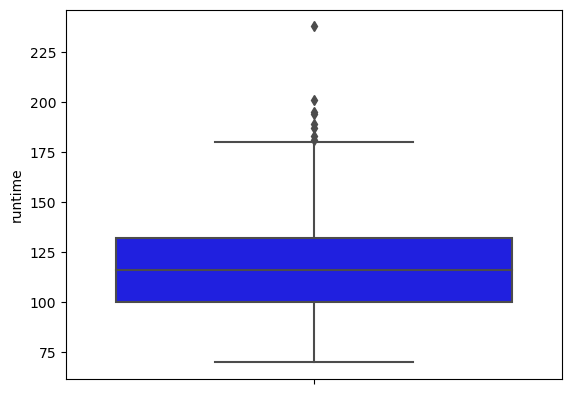

In [48]:
sns.boxplot(y=df2["runtime"], color = 'b')
plt.show()

In [49]:
x = df2[df2['runtime']>=175].index
mean = df2['runtime'].mean()
for index in x:
    df2.loc[index, 'runtime'] = mean

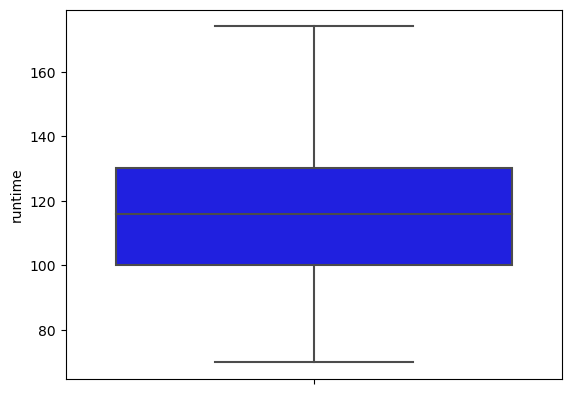

In [50]:
sns.boxplot(y=df2["runtime"], color = 'b')
plt.show()

In [ ]:
# x = top_500[top_500['revenue']>=4.8e+08].index
# median = top_500['revenue'].median()
# for index in x:
#     top_500.loc[index, 'revenue'] = median

## Task 11 : Identify and display the names of the movies along with their run times for those movies that have average runtime, using the data from the previous task.

In [51]:
avg_runtime = top_movies["runtime"].mean()
avg_runtime

118.72

In [52]:
df3 = top_movies[["title","runtime"]]

In [53]:
df4 = df3[df3.runtime > avg_runtime]
df4.sort_values("runtime", ascending = False)

,title,runtime
3813,Gone with the Wind,238.0
329,The Lord of the Rings: The Return of the King,201.0
1818,Schindler's List,195.0
25,Titanic,194.0
690,The Green Mile,189.0
...,...,...
2668,Pretty Woman,119.0
245,Tomorrow Never Dies,119.0
2667,Fatal Attraction,119.0
249,Insurgent,119.0


## Heat Map 

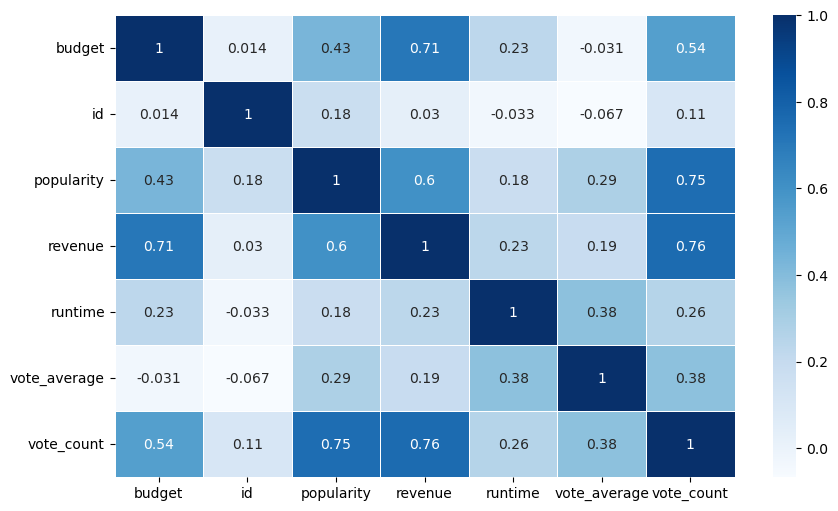

In [55]:
ig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), cbar = True, linewidth = 0.5, annot = True, cmap = 'Blues')
plt.show()